## Function warp_polar_5D
Transform an image with up to 5 dimensions into polar coordinates. Optionally returns axes projections, like cylinder projection (projection over radius axis).

$$ image\_polar(c, t, z, \phi, \rho) = warp\_polar\_5D(image(c, t, z, y, x)) $$

In [1]:
from biapol_utilities.transform import process_higher_dimension
from biapol_utilities.transform import warp_polar_5D
from biapol_utilities.data import hourglass
from skimage.morphology import disk
from skimage.transform import warp_polar
import numpy as np
from skimage.io import imread
import napari
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress=True)

### Create synthetic 3D data (z, x, y)

In [2]:
height = 3
radius = 3
filled_disk = disk(radius)
shape = (height, filled_disk.shape[0], filled_disk.shape[1])
filled_disk_in = np.zeros_like(filled_disk)
filled_disk_in[1:-1, 1:-1] = disk(radius - 1)
hollow_disk = filled_disk - filled_disk_in
cylinder = np.broadcast_to(hollow_disk, shape).astype(int)

Plot and print data:

[[[0 0 0 1 0 0 0]
  [0 1 1 0 1 1 0]
  [0 1 0 0 0 1 0]
  [1 0 0 0 0 0 1]
  [0 1 0 0 0 1 0]
  [0 1 1 0 1 1 0]
  [0 0 0 1 0 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 1 0 1 1 0]
  [0 1 0 0 0 1 0]
  [1 0 0 0 0 0 1]
  [0 1 0 0 0 1 0]
  [0 1 1 0 1 1 0]
  [0 0 0 1 0 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 1 0 1 1 0]
  [0 1 0 0 0 1 0]
  [1 0 0 0 0 0 1]
  [0 1 0 0 0 1 0]
  [0 1 1 0 1 1 0]
  [0 0 0 1 0 0 0]]]


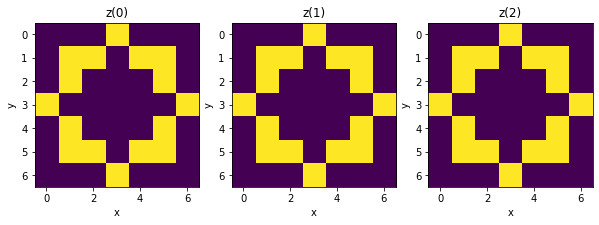

In [3]:
fig, ax = plt.subplots(1,3,figsize=[10,10])
for i in range(len(ax)):
    ax[i].imshow(cylinder[i])
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    title = 'z(' + str(i) + ')'
    ax[i].set_title(title)
print(cylinder)

### Apply warp_polar_5D to synthetic data

Transform it into (z, angle, radius) and plot every 45°:

In [4]:
cylinder_polar2 = process_higher_dimension(cylinder, warp_polar, radius=5)
cylinder_polar = warp_polar_5D(cylinder, radius = 5)

0
Input array must be 2-dimensional when `channel_axis=None`, got 3
1
Success after  1 reduced dimension(s)


Plot and print data:

[[[0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]
  [0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]
  [0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]
  [0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]]

 [[0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]
  [0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]
  [0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]
  [0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]]

 [[0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]
  [0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]
  [0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]
  [0.   0.   0.   1.   0.  ]
  [0.   0.   0.66 0.77 0.03]]]


C:\Users\mazo260d\AppData\Local\Temp/ipykernel_13540/801068805.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels([0,0,45,90,135,180,225,270,315,360])


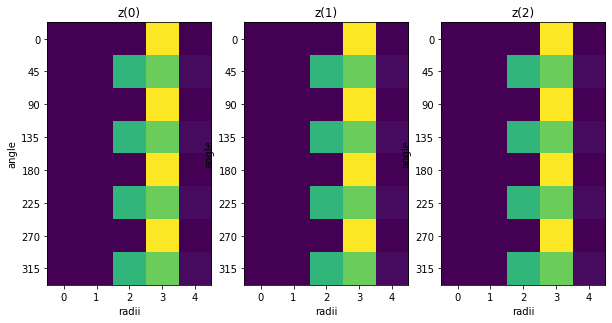

In [5]:
fig, ax = plt.subplots(1,3,figsize=[10,10])
for i in range(len(ax)):
    ax[i].imshow(cylinder_polar[i,::45,:])
    ax[i].set_xlabel('radii')
    ax[i].set_ylabel('angle')
    ax[i].set_yticklabels([0,0,45,90,135,180,225,270,315,360])
    title = 'z(' + str(i) + ')'
    ax[i].set_title(title)
print(cylinder_polar[:,::45,:])

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


C:\Users\mazo260d\AppData\Local\Temp/ipykernel_13540/4038078978.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels([0,0,45,90,135,180,225,270,315,360])


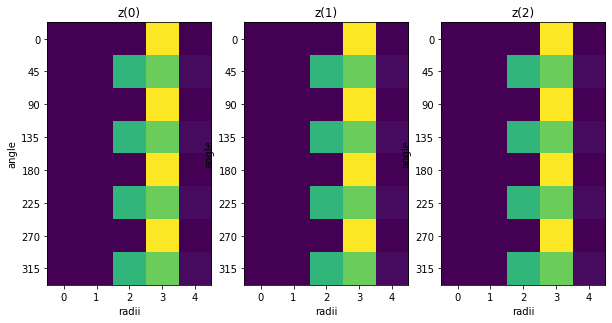

In [74]:
fig, ax = plt.subplots(1,3,figsize=[10,10])
for i in range(len(ax)):
    print(cylinder_polar2[i].compute()[::45,:])
    ax[i].imshow(cylinder_polar2[i].compute()[::45,:])
    ax[i].set_xlabel('radii')
    ax[i].set_ylabel('angle')
    ax[i].set_yticklabels([0,0,45,90,135,180,225,270,315,360])
    title = 'z(' + str(i) + ')'
    ax[i].set_title(title)
# print(cylinder_polar2.compute()[:,::45,:])

### Load synthetic 4D data (time, z, y, x)

Visualize it with napari. Data depicts a 3D hourglass with a half ring droplet that falls over time.

In [33]:
image = hourglass()
viewer = napari.Viewer()
viewer.add_image(image)

<Image layer 'image' at 0x1f9af0c3250>

Get screenshots from napari viewer:

In [36]:
screenshot_image = viewer.screenshot()

### Apply warp_polar_5D to synthetic data

Transform it into (time, z, angle, radius) and plot every 10°:

In [27]:
image_polar = warp_polar_5D(image)
image_polar2 = process_higher_dimension(image, warp_polar)

0
Input array must be 2-dimensional when `channel_axis=None`, got 4
1
Input array must be 2-dimensional when `channel_axis=None`, got 3
2
Success after  2 reduced dimension(s)


In [30]:
viewer.add_image(image_polar2)#[:,:,::10,:])

<Image layer 'image_polar' at 0x1f9af037790>

Get screenshots from napari viewer:

In [32]:
screenshot_image_polar = viewer.screenshot()

 Display image (x | y , z) view and polar image (radius | angle , z) view:

[]

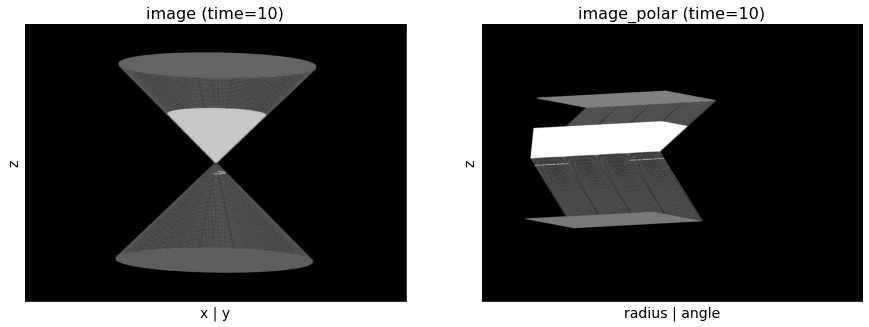

In [37]:
fig, ax = plt.subplots(1,2,figsize=[15,15])
ax[0].imshow(screenshot_image)
ax[0].set_xlabel('x | y', size=14)
ax[0].set_ylabel('z', size=14)
ax[0].set_title('image (time=10)', size=16)
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[1].imshow(screenshot_image_polar)
ax[1].set_xlabel('radius | angle', size=14)
ax[1].set_ylabel('z', size=14)
ax[1].set_title('image_polar (time=10)', size=16)
ax[1].set_yticks([])
ax[1].set_xticks([])

### Apply warp_polar_5D and get cylinder projection
Transform it into (time, z, angle) and plot one time point (time=10):

In [71]:
cylinder_projection = warp_polar_5D(image, project = 'r')

In [62]:
cylinder_projection2 = image_polar2.max(axis=-1)

Text(0.5, 1.0, 'time = 10')

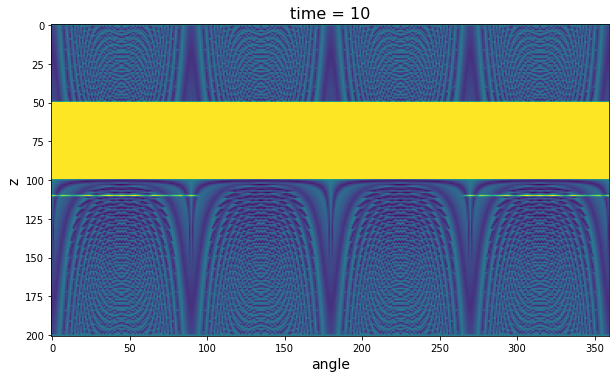

In [66]:
fig, ax = plt.subplots(figsize=[10,10])
ax.imshow(cylinder_projection2[10])
ax.set_xlabel('angle', size=14)
ax.set_ylabel('z', size=14)
ax.set_title('time = 10', size=16)

Plot data:

Text(0.5, 1.0, 'time = 10')

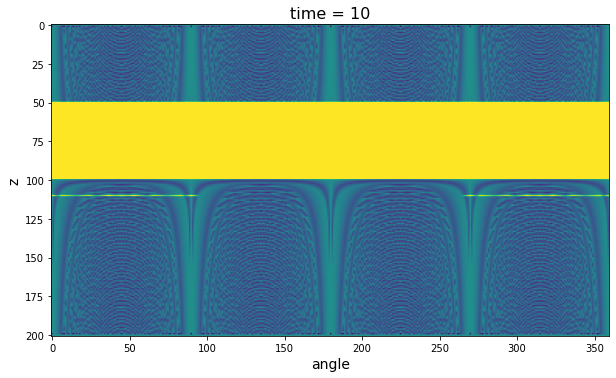

In [72]:
fig, ax = plt.subplots(figsize=[10,10])
ax.imshow(cylinder_projection[10])
ax.set_xlabel('angle', size=14)
ax.set_ylabel('z', size=14)
ax.set_title('time = 10', size=16)